# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


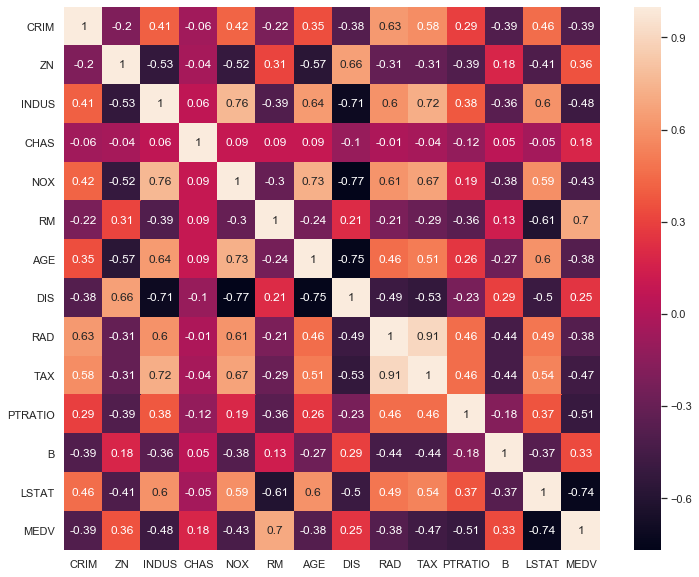

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

Because the TAX and RAD parameters are highly correlated (0.91) both should not be  used in training any model. As TAX has a higher correlation than RAD, the RAD feature will be dropped.

In [7]:
cm = cm.drop("RAD",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [8]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [9]:
# Parameterise everything

# No of variables to include in predictions
noParams = 3 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exp", "linear"]
act = acts[0]

# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[1]

noEpoch= 100
batchSize = 10

In [10]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [11]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [12]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [18]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    # Train the network
    m.fit(x_train, y_train, epochs=noEpoch, batch_size=batchSize)
    return m

In [19]:
def doModel(model, epo, bs):
    global x_trian, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [37]:
results= []

In [56]:
# Parameterise everything

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
act = acts[5]

# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[1]

noEpoch= 100
batchSize = 10

scaling = True

for noParams in range(1,12):
    x = getInputs(noParams)
    if scaling  == True:
        x_scaled = scaleDS(x)
    else:
        x_scaled = x
    splitDS(x_scaled)
    m = createModel(act, opt)
    results.append([noParams, scaling, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Epoch 1/100
354/354 [==============================] - 0s 455us/step - loss: 584.9947
Epoch 2/100
354/354 [==============================] - 0s 70us/step - loss: 572.1745
Epoch 3/100
354/354 [==============================] - 0s 73us/step - loss: 557.6185
Epoch 4/100
354/354 [==============================] - 0s 70us/step - loss: 540.2086
Epoch 5/100
354/354 [==============================] - 0s 68us/step - loss: 519.2048
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 494.0454
Epoch 7/100
354/354 [==============================] - 0s 79us/step - loss: 464.9691
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 431.9342
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 396.3514
Epoch 10/100
354/354 [==============================] - 0s 73us/step - loss: 359.0883
Epoch 11/100
354/354 [==============================] - 0s 79us/step - loss: 320.9814
Epoch 12/100
354/354 [==============================] - 0s 76u

354/354 [==============================] - 0s 72us/step - loss: 36.1408
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 36.0858
Epoch 99/100
354/354 [==============================] - 0s 70us/step - loss: 35.9991
Epoch 100/100
354/354 [==============================] - 0s 65us/step - loss: 36.0319
Epoch 1/100
354/354 [==============================] - 0s 68us/step - loss: 36.0230
Epoch 2/100
354/354 [==============================] - 0s 62us/step - loss: 36.0234
Epoch 3/100
354/354 [==============================] - 0s 65us/step - loss: 36.0262
Epoch 4/100
354/354 [==============================] - 0s 62us/step - loss: 36.1067
Epoch 5/100
354/354 [==============================] - 0s 62us/step - loss: 36.1080
Epoch 6/100
354/354 [==============================] - 0s 67us/step - loss: 36.0411
Epoch 7/100
354/354 [==============================] - 0s 65us/step - loss: 36.1584
Epoch 8/100
354/354 [==============================] - 0s 62us/step - loss: 36.0183


354/354 [==============================] - 0s 62us/step - loss: 36.0879
Epoch 94/100
354/354 [==============================] - 0s 65us/step - loss: 36.0142
Epoch 95/100
354/354 [==============================] - 0s 59us/step - loss: 36.0349
Epoch 96/100
354/354 [==============================] - 0s 62us/step - loss: 36.1013
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 36.0900
Epoch 98/100
354/354 [==============================] - 0s 62us/step - loss: 36.0815
Epoch 99/100
354/354 [==============================] - 0s 65us/step - loss: 36.0377
Epoch 100/100
152/152 [==============================] - 0s 125us/step
Epoch 1/100
354/354 [==============================] - 0s 463us/step - loss: 587.3716
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 571.0711
Epoch 3/100
354/354 [==============================] - 0s 56us/step - loss: 554.4246
Epoch 4/100
354/354 [==============================] - 0s 62us/step - loss: 535.7114
Epoch 

354/354 [==============================] - 0s 65us/step - loss: 30.8808
Epoch 89/100
354/354 [==============================] - 0s 68us/step - loss: 30.8752
Epoch 90/100
354/354 [==============================] - 0s 65us/step - loss: 30.8310
Epoch 91/100
354/354 [==============================] - 0s 65us/step - loss: 30.8034
Epoch 92/100
354/354 [==============================] - 0s 62us/step - loss: 30.8387
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 30.8937
Epoch 94/100
354/354 [==============================] - 0s 59us/step - loss: 30.9359
Epoch 95/100
354/354 [==============================] - 0s 62us/step - loss: 30.8956
Epoch 96/100
354/354 [==============================] - 0s 62us/step - loss: 30.8337
Epoch 97/100
354/354 [==============================] - 0s 65us/step - loss: 30.8575
Epoch 98/100
354/354 [==============================] - 0s 69us/step - loss: 30.8262
Epoch 99/100
354/354 [==============================] - 0s 68us/step - loss: 3

354/354 [==============================] - 0s 65us/step - loss: 30.9060
Epoch 85/100
354/354 [==============================] - 0s 65us/step - loss: 30.8664
Epoch 86/100
354/354 [==============================] - 0s 65us/step - loss: 30.9106
Epoch 87/100
354/354 [==============================] - 0s 62us/step - loss: 30.8040
Epoch 88/100
354/354 [==============================] - 0s 62us/step - loss: 30.8194
Epoch 89/100
354/354 [==============================] - 0s 65us/step - loss: 30.9325
Epoch 90/100
354/354 [==============================] - 0s 59us/step - loss: 30.8512
Epoch 91/100
354/354 [==============================] - 0s 62us/step - loss: 30.8600
Epoch 92/100
354/354 [==============================] - 0s 59us/step - loss: 30.8342
Epoch 93/100
354/354 [==============================] - 0s 62us/step - loss: 30.8639
Epoch 94/100
354/354 [==============================] - 0s 65us/step - loss: 30.8183
Epoch 95/100
354/354 [==============================] - 0s 62us/step - loss: 3

354/354 [==============================] - 0s 62us/step - loss: 27.7663
Epoch 80/100
354/354 [==============================] - 0s 65us/step - loss: 27.8416
Epoch 81/100
354/354 [==============================] - 0s 62us/step - loss: 27.9879
Epoch 82/100
354/354 [==============================] - 0s 62us/step - loss: 27.7507
Epoch 83/100
354/354 [==============================] - 0s 62us/step - loss: 27.7492
Epoch 84/100
354/354 [==============================] - 0s 65us/step - loss: 27.7728
Epoch 85/100
354/354 [==============================] - 0s 59us/step - loss: 27.7184
Epoch 86/100
354/354 [==============================] - 0s 67us/step - loss: 27.7594
Epoch 87/100
354/354 [==============================] - 0s 65us/step - loss: 27.7640
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 27.7645
Epoch 89/100
354/354 [==============================] - 0s 71us/step - loss: 27.7939
Epoch 90/100
354/354 [==============================] - 0s 61us/step - loss: 2

354/354 [==============================] - 0s 62us/step - loss: 27.8005
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 27.7747
Epoch 77/100
354/354 [==============================] - 0s 62us/step - loss: 27.8059
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 27.7363
Epoch 79/100
354/354 [==============================] - 0s 65us/step - loss: 27.7838
Epoch 80/100
354/354 [==============================] - 0s 65us/step - loss: 27.8498
Epoch 81/100
354/354 [==============================] - 0s 65us/step - loss: 27.7324
Epoch 82/100
354/354 [==============================] - 0s 65us/step - loss: 27.7772
Epoch 83/100
354/354 [==============================] - 0s 62us/step - loss: 27.7822
Epoch 84/100
354/354 [==============================] - 0s 68us/step - loss: 27.8199
Epoch 85/100
354/354 [==============================] - 0s 65us/step - loss: 27.8249
Epoch 86/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 63us/step - loss: 29.6691
Epoch 71/100
354/354 [==============================] - 0s 73us/step - loss: 29.6805
Epoch 72/100
354/354 [==============================] - 0s 62us/step - loss: 29.6680
Epoch 73/100
354/354 [==============================] - 0s 62us/step - loss: 29.6839
Epoch 74/100
354/354 [==============================] - 0s 62us/step - loss: 29.6474
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 29.8145
Epoch 76/100
354/354 [==============================] - 0s 62us/step - loss: 29.6502
Epoch 77/100
354/354 [==============================] - 0s 59us/step - loss: 29.7542
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 29.7018
Epoch 79/100
354/354 [==============================] - 0s 59us/step - loss: 29.7040
Epoch 80/100
354/354 [==============================] - 0s 65us/step - loss: 29.8304
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 56us/step - loss: 29.6923
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 29.7049
Epoch 68/100
354/354 [==============================] - 0s 62us/step - loss: 29.7117
Epoch 69/100
354/354 [==============================] - 0s 59us/step - loss: 29.8601
Epoch 70/100
354/354 [==============================] - 0s 59us/step - loss: 29.6624
Epoch 71/100
354/354 [==============================] - 0s 62us/step - loss: 29.7139
Epoch 72/100
354/354 [==============================] - 0s 62us/step - loss: 29.7953
Epoch 73/100
354/354 [==============================] - 0s 59us/step - loss: 29.6898
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 29.6697
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 29.6977
Epoch 76/100
354/354 [==============================] - 0s 62us/step - loss: 29.7907
Epoch 77/100
354/354 [==============================] - 0s 56us/step - loss: 2

354/354 [==============================] - 0s 68us/step - loss: 30.3445
Epoch 62/100
354/354 [==============================] - 0s 65us/step - loss: 30.3808
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 30.3114
Epoch 64/100
354/354 [==============================] - 0s 65us/step - loss: 30.4101
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 30.3128
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 30.3234
Epoch 67/100
354/354 [==============================] - 0s 68us/step - loss: 30.3621
Epoch 68/100
354/354 [==============================] - 0s 62us/step - loss: 30.3611
Epoch 69/100
354/354 [==============================] - 0s 65us/step - loss: 30.4794
Epoch 70/100
354/354 [==============================] - 0s 62us/step - loss: 30.3360
Epoch 71/100
354/354 [==============================] - 0s 62us/step - loss: 30.3759
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 3

354/354 [==============================] - 0s 65us/step - loss: 30.3810
Epoch 58/100
354/354 [==============================] - 0s 70us/step - loss: 30.3084
Epoch 59/100
354/354 [==============================] - 0s 65us/step - loss: 30.4458
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 30.2995
Epoch 61/100
354/354 [==============================] - 0s 65us/step - loss: 30.3225
Epoch 62/100
354/354 [==============================] - 0s 65us/step - loss: 30.4071
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 30.3267
Epoch 64/100
354/354 [==============================] - 0s 65us/step - loss: 30.3439
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 30.3097
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 30.4045
Epoch 67/100
354/354 [==============================] - 0s 68us/step - loss: 30.3975
Epoch 68/100
354/354 [==============================] - 0s 65us/step - loss: 3

354/354 [==============================] - 0s 70us/step - loss: 27.4100
Epoch 53/100
354/354 [==============================] - 0s 70us/step - loss: 27.5611
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 27.4795
Epoch 55/100
354/354 [==============================] - 0s 66us/step - loss: 27.5217
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 27.5309
Epoch 57/100
354/354 [==============================] - 0s 62us/step - loss: 27.4640
Epoch 58/100
354/354 [==============================] - 0s 62us/step - loss: 27.4984
Epoch 59/100
354/354 [==============================] - 0s 70us/step - loss: 27.4527
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 27.4836
Epoch 61/100
354/354 [==============================] - 0s 65us/step - loss: 27.5576
Epoch 62/100
354/354 [==============================] - 0s 62us/step - loss: 27.4874
Epoch 63/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 27.4965
Epoch 49/100
354/354 [==============================] - 0s 73us/step - loss: 27.5336
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 27.5971
Epoch 51/100
354/354 [==============================] - 0s 68us/step - loss: 27.5438
Epoch 52/100
354/354 [==============================] - 0s 68us/step - loss: 27.4853
Epoch 53/100
354/354 [==============================] - 0s 62us/step - loss: 27.5228
Epoch 54/100
354/354 [==============================] - 0s 65us/step - loss: 27.6177
Epoch 55/100
354/354 [==============================] - 0s 65us/step - loss: 27.5972
Epoch 56/100
354/354 [==============================] - 0s 65us/step - loss: 27.4734
Epoch 57/100
354/354 [==============================] - 0s 66us/step - loss: 27.5411
Epoch 58/100
354/354 [==============================] - 0s 68us/step - loss: 27.5106
Epoch 59/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 68us/step - loss: 26.2483
Epoch 44/100
354/354 [==============================] - 0s 70us/step - loss: 26.2598
Epoch 45/100
354/354 [==============================] - 0s 71us/step - loss: 26.0988
Epoch 46/100
354/354 [==============================] - 0s 62us/step - loss: 26.2039
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 26.1658
Epoch 48/100
354/354 [==============================] - 0s 68us/step - loss: 26.2061
Epoch 49/100
354/354 [==============================] - 0s 65us/step - loss: 26.1726
Epoch 50/100
354/354 [==============================] - 0s 65us/step - loss: 26.1968
Epoch 51/100
354/354 [==============================] - 0s 62us/step - loss: 26.1947
Epoch 52/100
354/354 [==============================] - 0s 65us/step - loss: 26.1876
Epoch 53/100
354/354 [==============================] - 0s 65us/step - loss: 26.1627
Epoch 54/100
354/354 [==============================] - 0s 62us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 26.2157
Epoch 40/100
354/354 [==============================] - 0s 78us/step - loss: 26.1605
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 26.2251
Epoch 42/100
354/354 [==============================] - 0s 65us/step - loss: 26.1535
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: 26.1014
Epoch 44/100
354/354 [==============================] - 0s 66us/step - loss: 26.3184
Epoch 45/100
354/354 [==============================] - 0s 65us/step - loss: 26.2479
Epoch 46/100
354/354 [==============================] - 0s 62us/step - loss: 26.1227
Epoch 47/100
354/354 [==============================] - 0s 68us/step - loss: 26.0884
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: 26.2246
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: 26.2949
Epoch 50/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 23.8355
Epoch 35/100
354/354 [==============================] - 0s 76us/step - loss: 23.6493
Epoch 36/100
354/354 [==============================] - 0s 76us/step - loss: 23.5388
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: 23.4226
Epoch 38/100
354/354 [==============================] - 0s 75us/step - loss: 23.5498
Epoch 39/100
354/354 [==============================] - 0s 79us/step - loss: 23.3282
Epoch 40/100
354/354 [==============================] - 0s 73us/step - loss: 23.2952
Epoch 41/100
354/354 [==============================] - 0s 73us/step - loss: 23.3464
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 23.3890
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 23.2428
Epoch 44/100
354/354 [==============================] - 0s 76us/step - loss: 23.2720
Epoch 45/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 23.3188
Epoch 31/100
354/354 [==============================] - 0s 79us/step - loss: 23.2474
Epoch 32/100
354/354 [==============================] - 0s 76us/step - loss: 23.2973
Epoch 33/100
354/354 [==============================] - 0s 79us/step - loss: 23.2549
Epoch 34/100
354/354 [==============================] - 0s 73us/step - loss: 23.3259
Epoch 35/100
354/354 [==============================] - 0s 72us/step - loss: 23.2514
Epoch 36/100
354/354 [==============================] - 0s 73us/step - loss: 23.2553
Epoch 37/100
354/354 [==============================] - 0s 73us/step - loss: 23.2713
Epoch 38/100
354/354 [==============================] - 0s 76us/step - loss: 23.2578
Epoch 39/100
354/354 [==============================] - 0s 88us/step - loss: 23.2899
Epoch 40/100
354/354 [==============================] - 0s 138us/step - loss: 23.4142
Epoch 41/100
354/354 [==============================] - 0s 121us/step - loss:

354/354 [==============================] - 0s 79us/step - loss: 54.9705
Epoch 26/100
354/354 [==============================] - 0s 82us/step - loss: 48.3005
Epoch 27/100
354/354 [==============================] - 0s 82us/step - loss: 43.4849
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 39.2504
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 36.4679
Epoch 30/100
354/354 [==============================] - 0s 79us/step - loss: 34.3204
Epoch 31/100
354/354 [==============================] - 0s 76us/step - loss: 32.6562
Epoch 32/100
354/354 [==============================] - 0s 79us/step - loss: 31.6713
Epoch 33/100
354/354 [==============================] - 0s 76us/step - loss: 30.9465
Epoch 34/100
354/354 [==============================] - 0s 76us/step - loss: 30.5314
Epoch 35/100
354/354 [==============================] - 0s 73us/step - loss: 30.0769
Epoch 36/100
354/354 [==============================] - 0s 90us/step - loss: 2

354/354 [==============================] - 0s 85us/step - loss: 29.1752
Epoch 22/100
354/354 [==============================] - 0s 79us/step - loss: 29.1648
Epoch 23/100
354/354 [==============================] - 0s 76us/step - loss: 29.0741
Epoch 24/100
354/354 [==============================] - 0s 76us/step - loss: 29.1633
Epoch 25/100
354/354 [==============================] - 0s 76us/step - loss: 29.1080
Epoch 26/100
354/354 [==============================] - 0s 76us/step - loss: 29.1899
Epoch 27/100
354/354 [==============================] - 0s 76us/step - loss: 29.2402
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 29.3167
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 29.5952
Epoch 30/100
354/354 [==============================] - 0s 76us/step - loss: 29.5377
Epoch 31/100
354/354 [==============================] - 0s 82us/step - loss: 29.3609
Epoch 32/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 99us/step - loss: 200.1463
Epoch 17/100
354/354 [==============================] - 0s 87us/step - loss: 173.7516
Epoch 18/100
354/354 [==============================] - 0s 93us/step - loss: 149.0477
Epoch 19/100
354/354 [==============================] - 0s 92us/step - loss: 126.1501
Epoch 20/100
354/354 [==============================] - 0s 89us/step - loss: 106.5842
Epoch 21/100
354/354 [==============================] - 0s 96us/step - loss: 88.6821
Epoch 22/100
354/354 [==============================] - 0s 82us/step - loss: 73.9968
Epoch 23/100
354/354 [==============================] - 0s 79us/step - loss: 61.6870
Epoch 24/100
354/354 [==============================] - 0s 82us/step - loss: 51.7446
Epoch 25/100
354/354 [==============================] - 0s 82us/step - loss: 44.0375
Epoch 26/100
354/354 [==============================] - 0s 79us/step - loss: 37.9286
Epoch 27/100
354/354 [==============================] - 0s 82us/step - lo

354/354 [==============================] - 0s 82us/step - loss: 22.7684
Epoch 13/100
354/354 [==============================] - 0s 85us/step - loss: 22.7214
Epoch 14/100
354/354 [==============================] - 0s 79us/step - loss: 22.6847
Epoch 15/100
354/354 [==============================] - 0s 85us/step - loss: 22.6902
Epoch 16/100
354/354 [==============================] - 0s 82us/step - loss: 22.7368
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 22.7469
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 22.9865
Epoch 19/100
354/354 [==============================] - 0s 79us/step - loss: 22.6971
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 22.7590
Epoch 21/100
354/354 [==============================] - 0s 79us/step - loss: 22.7791
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 22.8121
Epoch 23/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 156us/step - loss: 465.0271
Epoch 8/100
354/354 [==============================] - 0s 107us/step - loss: 441.1482
Epoch 9/100
354/354 [==============================] - 0s 76us/step - loss: 416.0849
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 390.2384
Epoch 11/100
354/354 [==============================] - 0s 82us/step - loss: 362.8383
Epoch 12/100
354/354 [==============================] - 0s 73us/step - loss: 334.6385
Epoch 13/100
354/354 [==============================] - 0s 70us/step - loss: 305.7460
Epoch 14/100
354/354 [==============================] - 0s 76us/step - loss: 276.0931
Epoch 15/100
354/354 [==============================] - 0s 73us/step - loss: 247.3074
Epoch 16/100
354/354 [==============================] - 0s 73us/step - loss: 219.2854
Epoch 17/100
354/354 [==============================] - 0s 76us/step - loss: 192.3119
Epoch 18/100
354/354 [==============================] - 0s 76us/ste

354/354 [==============================] - 0s 71us/step - loss: 22.4685
Epoch 4/100
354/354 [==============================] - 0s 70us/step - loss: 22.5409
Epoch 5/100
354/354 [==============================] - 0s 71us/step - loss: 22.5234
Epoch 6/100
354/354 [==============================] - 0s 69us/step - loss: 22.4050
Epoch 7/100
354/354 [==============================] - 0s 70us/step - loss: 22.4552
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 22.4394
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 22.5310
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 22.4486
Epoch 11/100
354/354 [==============================] - 0s 70us/step - loss: 22.4171
Epoch 12/100
354/354 [==============================] - 0s 70us/step - loss: 22.4480
Epoch 13/100
354/354 [==============================] - 0s 68us/step - loss: 22.4713
Epoch 14/100
354/354 [==============================] - 0s 70us/step - loss: 22.4347

354/354 [==============================] - 0s 68us/step - loss: 22.3887
Epoch 100/100
152/152 [==============================] - 0s 157us/step


In [57]:
results

[[1, True, 0.3, 'relu', 'adam', 100, 10, 27.32118797302246],
 [2, True, 0.3, 'relu', 'adam', 100, 10, 22.04106576819169],
 [3, True, 0.3, 'relu', 'adam', 100, 10, 14.18746566772461],
 [4, True, 0.3, 'relu', 'adam', 100, 10, 19.096793927644427],
 [5, True, 0.3, 'relu', 'adam', 100, 10, 11.0178400842767],
 [6, True, 0.3, 'relu', 'adam', 100, 10, 17.11524516657779],
 [7, True, 0.3, 'relu', 'adam', 100, 10, 19.61126678868344],
 [8, True, 0.3, 'relu', 'adam', 100, 10, 23.401436755531712],
 [9, True, 0.3, 'relu', 'adam', 100, 10, 14.262699528744346],
 [10, True, 0.3, 'relu', 'adam', 100, 10, 15.121458957069798],
 [11, True, 0.3, 'relu', 'adam', 100, 10, 13.429914876034385],
 [1, False, 0.3, 'relu', 'adam', 100, 10, 36.056541744031406],
 [2, False, 0.3, 'relu', 'adam', 100, 10, 20.85169711865877],
 [3, False, 0.3, 'relu', 'adam', 100, 10, 26.997887962742855],
 [4, False, 0.3, 'relu', 'adam', 100, 10, 24.469030882182874],
 [5, False, 0.3, 'relu', 'adam', 100, 10, 35.802956129375254],
 [6, Fals

In [55]:
# Check to see how we do on test
m.predict(x_test).round().T

array([[12., 32., 12., 20., 19., 21., 20., 26., 28., 34., 15., 41., 11.,
        18., 16., 27., 24., 23., 18., 33., 19., 27., 20.,  7., 28., 18.,
        16., 21., 30., 16.,  9., 23., 17., 24., 35., 13., 30., 11., 23.,
        24., 33., 18., 12.,  8., 13., 13., 18., 13., 25., 30.,  9., 13.,
        23., 13., 15.,  9., 27., 30., 20., 25., 33., 12., 22., 33., 17.,
        13., 31., 27., 15., 20., 28., 33., 18., 17., 22., 26., 39., 13.,
        21., 18., 14., 28., 15., 26., 22., 17., 17., 31., 25., 34.,  6.,
        22., 28., 26., 17., 24., 10., 26., 21., 19., 22., 34., 17., 25.,
         7., 43.,  7., 16., 36., 13., 25., 14., 22., 24., 15., 21., 46.,
        19., 30., 30., 36., 12., 33., 13., 19., 19., 16., 19., 19., 20.,
        19., 18., 12., 15., 30., 14., 23., 24., 15., 26., 19., 20., 20.,
        23., 16., 20., 30., 28., 26., 42., 24., 13.]], dtype=float32)

In [ ]:
# The actual test values
y_test.values.astype(np.float32)

In [ ]:
# Calculate the loss function (Mean squared error in our case)
m.evaluate(x_test, y_test)